In [1]:
import pandas as pd

data = pd.read_csv("./Data4.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63984 entries, 0 to 63983
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  63984 non-null  int64  
 1   month                 63984 non-null  int64  
 2   day                   63984 non-null  int64  
 3   hour                  63984 non-null  int64  
 4   weekend               63984 non-null  int64  
 5   holiday               63984 non-null  int64  
 6   temp                  63984 non-null  float64
 7   precipitation         63984 non-null  float64
 8   wind_speed            63984 non-null  float64
 9   preasure              63984 non-null  float64
 10  electricity_consumed  63984 non-null  float64
 11  prev_avg_e            63984 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 5.9 MB


In [2]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

c:\Users\aditya\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_statistics.py:32: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.21.4)
  from scipy.stats import gaussian_kde


In [4]:
fig = px.scatter(data, 
                 x='electricity_consumed', 
                 y='prev_avg_e',
                 opacity=0.8, 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [3]:
data.corr()

,year,month,day,hour,weekend,holiday,temp,precipitation,wind_speed,preasure,electricity_consumed,prev_avg_e
year,1.000000e+00,-8.980344e-02,-8.735385e-03,4.075593e-16,-1.413351e-03,5.964085e-03,-9.846559e-02,-0.038512,-0.237931,0.057485,0.038185,4.475476e-02
month,-8.980344e-02,1.000000e+00,1.389860e-02,-1.128797e-16,2.920578e-03,3.598547e-02,1.095890e-01,0.034870,-0.266074,-0.080447,0.107402,1.304870e-01
day,-8.735385e-03,1.389860e-02,1.000000e+00,-2.864860e-17,-1.141492e-03,7.261872e-03,-7.009842e-03,0.027893,0.015771,-0.004146,-0.000082,-2.506880e-05
hour,4.075593e-16,-1.128797e-16,-2.864860e-17,1.000000e+00,-9.879521e-18,1.923700e-17,1.487542e-16,-0.000252,0.000011,-0.000205,0.226709,7.212742e-16
weekend,-1.413351e-03,2.920578e-03,-1.141492e-03,-9.879521e-18,1.000000e+00,-2.081101e-02,-1.143631e-02,0.039392,0.013187,0.010928,-0.081124,4.186042e-03
holiday,5.964085e-03,3.598547e-02,7.261872e-03,1.923700e-17,-2.081101e-02,1.000000e+00,1.812946e-02,0.013673,-0.010116,-0.009636,-0.048755,-1.461312e-02
temp,-9.846559e-02,1.095890e-01,-7.009842e-03,1.487542e-16,-1.143631e-02,1.812946e-02,1.000000e+00,0.032519,0.359438,-0.849196,0.639087,7.200545e-01
precipitation,-3.851182e-02,3.487017e-02,2.789340e-02,-2.521314e-04,3.939179e-02,1.367253e-02,3.251926e-02,1.000000,0.041275,-0.156442,0.049811,1.056511e-01
wind_speed,-2.379313e-01,-2.660743e-01,1.577132e-02,1.134906e-05,1.318684e-02,-1.011576e-02,3.594377e-01,0.041275,1.000000,-0.389709,0.284510,3.457445e-01
preasure,5.748531e-02,-8.044654e-02,-4.145903e-03,-2.053982e-04,1.092804e-02,-9.636281e-03,-8.491960e-01,-0.156442,-0.389709,1.000000,-0.670241,-7.732936e-01


In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [121]:

# Split data into features and target
X = data[['month', 'hour', 'temp', 'wind_speed', 'preasure']]
y = data['electricity_consumed']

print(data)


       year  month  day  hour  weekend  holiday   temp  precipitation  \
0      2017      1    1     0        1        0  15.85            3.3   
1      2017      1    1     1        1        0  15.85            0.8   
2      2017      1    1     2        1        0  15.85            2.8   
3      2017      1    1     3        1        0  15.85            0.5   
4      2017      1    1     4        1        0  15.85            0.8   
...     ...    ...  ...   ...      ...      ...    ...            ...   
63979  2024      4   19    19        0        0  31.75            0.0   
63980  2024      4   19    20        0        0  31.75            0.0   
63981  2024      4   19    21        0        0  31.75            0.0   
63982  2024      4   19    22        0        0  31.75            0.0   
63983  2024      4   19    23        0        0  31.75            0.0   

       wind_speed  preasure  electricity_consumed  
0            5.70    1016.7               1775.69  
1            5.70  

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(model.predict(X))

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

joblib.dump(model, "lr_model.pkl")


example_data = pd.DataFrame({
    'month' : [6],
    'hour' : [14],
    'temp' : [38],
    'wind_speed' : [11.1],
    'preasure': [1012.7]
})

# scaler = joblib.load("scaler.pkl")
# example_data[['temp', 'wind_speed', 'preasure']] = scaler.fit_transform(example_data[['temp', 'wind_speed', 'preasure']])
predictions = model.predict(example_data)

print(predictions)

[2144.55086662 2183.57353205 2222.59619747 ... 4639.50118805 4678.52385348
 4717.5465189 ]
Mean Squared Error: 685280.7648499067
R^2 Score: 0.5146138918456982
[4025.81216906]


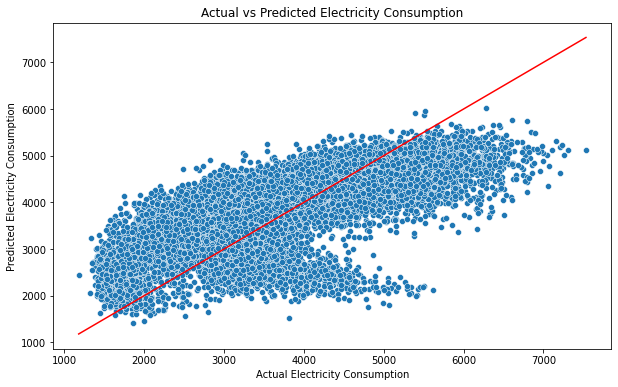

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results_df)
sns.lineplot(x='Actual', y='Actual', data=results_df, color='red')  # Line of best fit

plt.title('Actual vs Predicted Electricity Consumption')
plt.xlabel('Actual Electricity Consumption')
plt.ylabel('Predicted Electricity Consumption')
plt.show()